In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
#Load the dataset
df = pd.read_csv('/content/500325.csv')  # Changed 'data' to 'df' to avoid overwriting
df.head()


,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,20-February-2025,1226.25,1239.40,1223.00,1233.05,1235.400020,206262,6415,254816079.0,134142.0,65.03,16.40,6.80
1,19-February-2025,1222.75,1232.80,1217.60,1226.95,1226.458523,110206,3823,135163088.0,41958.0,38.07,15.20,4.20
2,18-February-2025,1225.25,1229.95,1216.40,1224.95,1223.204760,206583,7437,252693309.0,103728.0,50.21,13.55,-0.30
3,17-February-2025,1215.75,1227.20,1205.15,1224.75,1219.267096,207944,7688,253539277.0,95627.0,45.99,22.05,9.00
4,14-February-2025,1220.00,1224.30,1206.00,1216.95,1211.931885,358010,10146,433883734.0,254865.0,71.19,18.30,-3.05


In [ ]:
df["Date"] = pd.to_datetime(df["Date"],format="%d-%B-%Y") # This line now operates on the original DataFrame
df = df.sort_values(by="Date")

In [ ]:
#Extract 'Close price' for training
data = df["Close Price"].values.reshape(-1,1) # Use 'df' here

In [ ]:
data[0:10]



array([[2589.85],
       [2610.9 ],
       [2582.95],
       [2597.4 ],
       [2606.75],
       [2586.1 ],
       [2580.6 ],
       [2649.95],
       [2718.4 ],
       [2740.1 ]])

In [ ]:
#Normalize data using minmax scaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
#Function to create sequence for LSTM
def create_sequences(data, seq_length, prediction_length):
    X,y = [],[]

    for i in range(len(data) - seq_length - prediction_length + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+prediction_length])

    return np.array(X), np.array(y)

In [ ]:
#Define sequence and prediction lengths
seq_length = 10
prediction_length = 7

In [ ]:
#Create sequences
X,y = create_sequences(data, seq_length, prediction_length)

In [ ]:

#Split
train_size = int(0.8*len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [ ]:
X_train.shape



(216, 10, 1)

In [ ]:
X_test.shape

(55, 10, 1)

In [ ]:
#Build LSTM model
model = Sequential([
  LSTM(50, activation="relu", return_sequences=True , input_shape=(seq_length, 1)),
  LSTM(50, activation="relu"),
  Dense(prediction_length)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile model
model.compile(optimizer="adam", loss="mse")

#Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.6160
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3490
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0612
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0348
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0214
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0195
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0211
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0157
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0204
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0178
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0127
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0160
Epoch 16

In [ ]:
#Predict next 7 days using the latest sequence
last_sequence = data[-seq_length:].reshape(1, seq_length, 1)
predicted_scaled = model.predict(last_sequence)
predicted = scaler.inverse_transform(predicted_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


In [ ]:
# Convert back to actual price values
predicted_prices = scaler.inverse_transform(predicted_scaled.reshape(-1,1))

In [ ]:
# Generate future dates
last_date = df["Date"].iloc[-1] # Use 'df' to access the 'Date' column
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)
# Print the predictions
prediction_df = pd.DataFrame({"Date": future_dates, "Predicted Close Price": predicted_prices.flatten()})
print("\nPredicted Stock Prices for the Next 7 Days:\n")
print(prediction_df)


Predicted Stock Prices for the Next 7 Days:

        Date  Predicted Close Price
0 2025-02-21            1306.907104
1 2025-02-22            1327.333252
2 2025-02-23            1261.198120
3 2025-02-24            1295.534058
4 2025-02-25            1288.346558
5 2025-02-26            1318.998047
6 2025-02-27            1311.134521


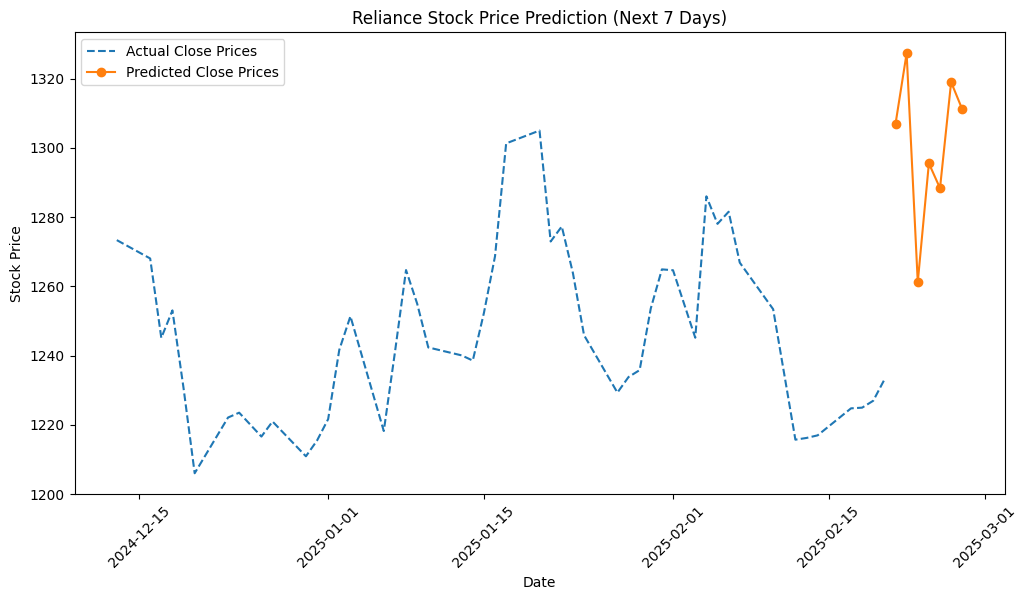

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df["Date"].iloc[-50:], df["Close Price"].iloc[-50:], label="Actual Close Prices", linestyle="dashed") # Use 'df' here
plt.plot(future_dates, predicted_prices, label="Predicted Close Prices", marker="o")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.legend()
plt.title("Reliance Stock Price Prediction (Next 7 Days)")
plt.show()